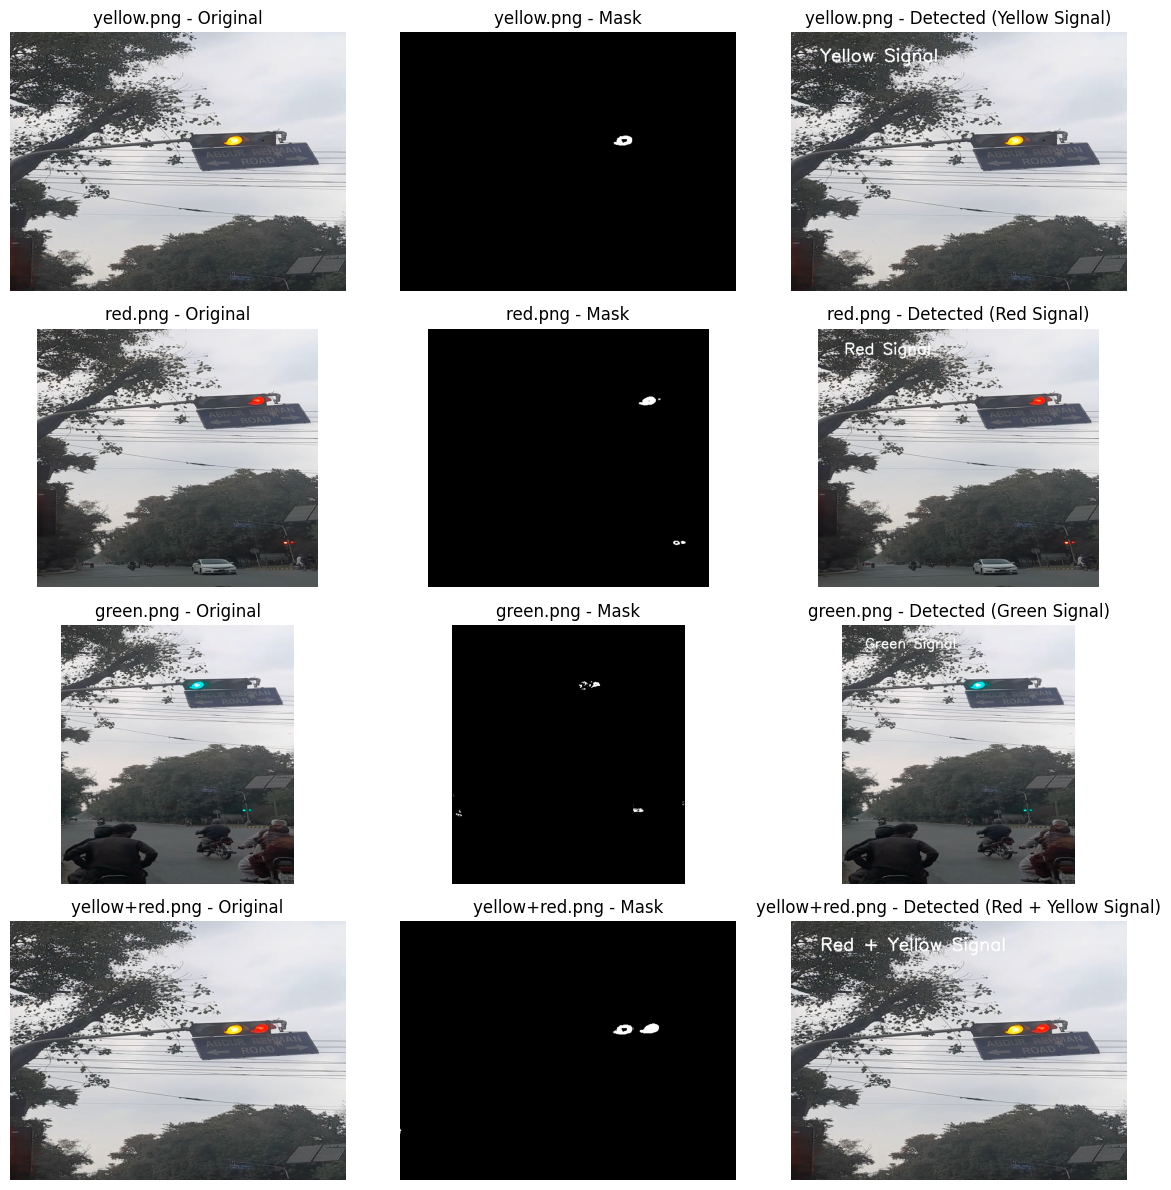

In [33]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def classify_signal(image_path):
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define color ranges for Red, Yellow, and Green
    lower_red1, upper_red1 = np.array([0, 120, 70]), np.array([10, 255, 255])
    lower_red2, upper_red2 = np.array([170, 120, 70]), np.array([180, 255, 255])
    lower_yellow, upper_yellow = np.array([15, 90, 90]),np.array([35, 255, 255])
    lower_green, upper_green = np.array([40, 50, 50]), np.array([90, 255, 255])

    # Create masks
    mask_red = cv2.inRange(hsv, lower_red1, upper_red1) + cv2.inRange(hsv, lower_red2, upper_red2)
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_green = cv2.inRange(hsv, lower_green, upper_green)

    # Count non-zero pixels in each mask
    red_pixels, yellow_pixels, green_pixels = np.count_nonzero(mask_red), np.count_nonzero(mask_yellow), np.count_nonzero(mask_green)

    # Threshold to determine mixed signals
    threshold = 300  # Adjust based on testing

    # Determine the color with the most pixels
    if red_pixels > threshold and yellow_pixels > threshold:
        return "Red + Yellow Signal", mask_red + mask_yellow
    elif red_pixels > yellow_pixels and red_pixels > green_pixels:
        return "Red Signal", mask_red
    elif yellow_pixels > red_pixels and yellow_pixels > green_pixels:
        return "Yellow Signal", mask_yellow
    elif green_pixels > red_pixels and green_pixels > yellow_pixels:
        return "Green Signal", mask_green
    else:
        return "No Signal Detected", None

# Directory containing images
image_directory = "./"
images = [file for file in os.listdir(image_directory) if file.endswith(('.jpg', '.png', '.jpeg'))]

# Create a subplot with 3 rows and 3 columns
fig, axes = plt.subplots(4, 3, figsize=(12, 12))

for idx, file in enumerate(images[:]):  # Process only first 3 images
    image_path = os.path.join(image_directory, file)
    status, mask = classify_signal(image_path)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Original Image
    axes[idx, 0].imshow(image_rgb)
    axes[idx, 0].set_title(f"{file} - Original")
    axes[idx, 0].axis("off")

    # Mask Image
    if mask is not None:
        axes[idx, 1].imshow(mask, cmap='gray')
        axes[idx, 1].set_title(f"{file} - Mask")
        axes[idx, 1].axis("off")

    # Detected Signal
    annotated_image = image_rgb.copy()
    cv2.putText(annotated_image, status, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    axes[idx, 2].imshow(annotated_image)
    axes[idx, 2].set_title(f"{file} - Detected ({status})")
    axes[idx, 2].axis("off")

plt.tight_layout()
plt.show()